In [2]:
import geopandas as gpd

In [3]:
zipfile = "zip:///Users/annes/git/aaa-2022-magma/00_data/DE008L2_LEIPZIG_UA2018_v013.zip"
file = "C:///Users/annes/git/aaa-2022-magma/00_data/DE008L2_LEIPZIG_UA2018_v013/Data/DE008L2_LEIPZIG_UA2018_v013.gpkg"
land_use = gpd.read_file(file)
land_use

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,4528-DE008L2,217.574900,2108.057565,None,1,"MULTIPOLYGON (((4539847.774 3132119.577, 45397..."
1,DE,Leipzig,DE008L2,11100,Continuous urban fabric (S.L. : > 80%),2020-08,581-DE008L2,195.623086,2033.621751,None,10,"MULTIPOLYGON (((4538551.128 3135860.833, 45385..."
2,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,2923-DE008L2,540.484448,13851.599882,None,95,"MULTIPOLYGON (((4494313.853 3115453.055, 44943..."
3,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,3969-DE008L2,135.628940,1080.015902,None,2,"MULTIPOLYGON (((4487083.702 3129855.386, 44870..."
4,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,5569-DE008L2,336.629685,6332.695900,None,92,"MULTIPOLYGON (((4480481.616 3137548.762, 44804..."
...,...,...,...,...,...,...,...,...,...,...,...,...
38105,DE,Leipzig,DE008L2,32000,Herbaceous vegetation associations (natural gr...,2020-08,37294-DE008L2,867.332676,34113.835118,None,0,"MULTIPOLYGON (((4496000.000 3121697.642, 44960..."
38106,DE,Leipzig,DE008L2,13100,Mineral extraction and dump sites,2020-08,21690-DE008L2,498.847064,12445.700582,None,0,"MULTIPOLYGON (((4480822.425 3128984.602, 44808..."
38107,DE,Leipzig,DE008L2,32000,Herbaceous vegetation associations (natural gr...,2020-08,37274-DE008L2,1194.109897,92604.148539,None,0,"MULTIPOLYGON (((4485495.975 3126043.280, 44855..."
38108,DE,Leipzig,DE008L2,50000,Water,2020-08,37675-DE008L2,1135.524747,42997.815199,None,0,"MULTIPOLYGON (((4475754.762 3120039.550, 44757..."


<AxesSubplot:>

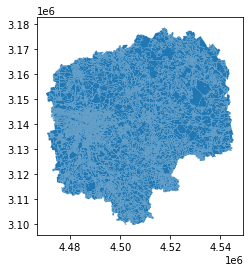

In [4]:
land_use.plot()

In [5]:
land_use["class_2018"].unique()

array(['Discontinuous dense urban fabric (S.L. : 50% -  80%)',
       'Continuous urban fabric (S.L. : > 80%)', 'Pastures',
       'Arable land (annual crops)',
       'Herbaceous vegetation associations (natural grassland, moors...)',
       'Industrial, commercial, public, military and private units',
       'Fast transit roads and associated land',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Other roads and associated land', 'Isolated structures',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Railways and associated land', 'Land without current use',
       'Green urban areas', 'Sports and leisure facilities',
       'Mineral extraction and dump sites', 'Forests',
       'Discontinuous very low density urban fabric (S.L. : < 10%)',
       'Water', 'Construction sites',
       'Permanent crops (vineyards, fruit trees, olive groves)',
       'Wetlands',
       'Open spaces with little or no vegetation (beaches, dunes, ba

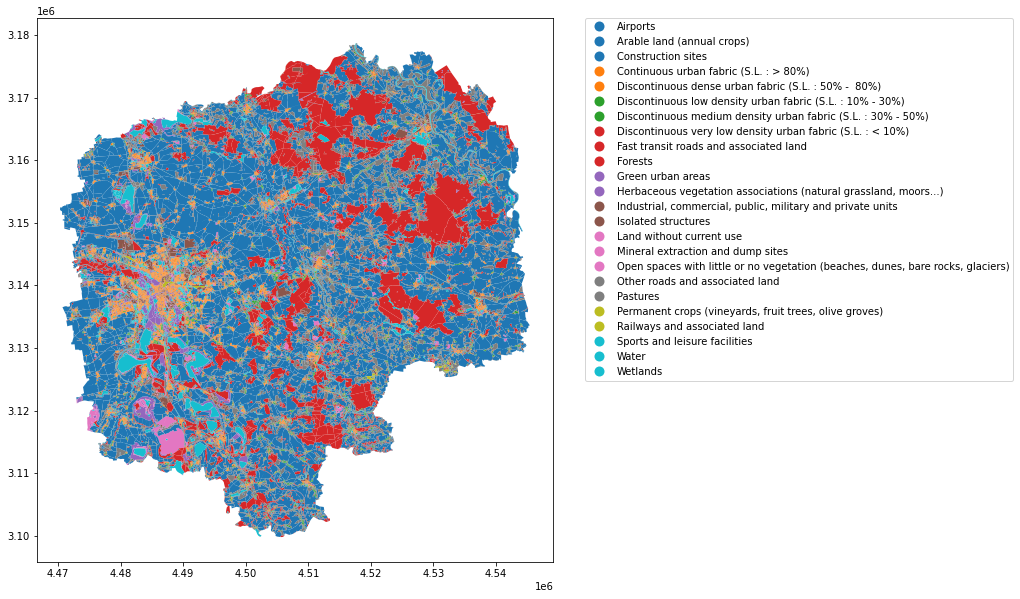

In [6]:
land_use.plot(column='class_2018', figsize=(20, 10), legend=True,legend_kwds={'bbox_to_anchor': (1.9, 1.01)});

## Reduce land data set to trip zone 

In [7]:
import sys, os
import tarfile
import os
sys.path.append(os.path.abspath('..'))
%load_ext autoreload
%autoreload 2

from modules.config import *
tarfile_path = TRIPS_TARFILE_PATH
unpacked_path = UNPACKED_TRIPS_DIR_PATH

# Unpack
with tarfile.open(tarfile_path, 'r') as tar:
	tar.extractall(DATA_DIR_PATH)
# find all csv files in the unpacked directory
csv_files = []

def get_csv_files_recursively(path):
	for file in os.listdir(path):
		if os.path.isdir(os.path.join(path, file)):
			get_csv_files_recursively(os.path.join(path, file))
		elif file.endswith(".csv"):
			csv_files.append(os.path.join(path, file))

get_csv_files_recursively(unpacked_path)

csv_files[:5]

['c:\\Users\\annes\\git\\aaa-2022-magma\\00_data\\leipzig\\2019\\01\\positions_nextbike_leipzig_2019_01_20.csv',
 'c:\\Users\\annes\\git\\aaa-2022-magma\\00_data\\leipzig\\2019\\01\\positions_nextbike_leipzig_2019_01_21.csv',
 'c:\\Users\\annes\\git\\aaa-2022-magma\\00_data\\leipzig\\2019\\01\\positions_nextbike_leipzig_2019_01_22.csv',
 'c:\\Users\\annes\\git\\aaa-2022-magma\\00_data\\leipzig\\2019\\01\\positions_nextbike_leipzig_2019_01_23.csv',
 'c:\\Users\\annes\\git\\aaa-2022-magma\\00_data\\leipzig\\2019\\01\\positions_nextbike_leipzig_2019_01_24.csv']

In [8]:
#read data
import shapely
flexzone = gpd.read_file(FLEXZONE_GEOJSON_PATH)

In [9]:
#switch coordinates
flexzone.geometry = flexzone.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))
flexzone

,color,fill,name,domain,cityId,category,geometry
0,#00CBFF,#00CBFF,LE_Blau_West,le,1,free_return,"POLYGON ((51.30176 12.32817, 51.30065 12.32812..."
1,#ff00e7,#ff00e7,LE_Pink_Ost,le,1,chargeable_return,"POLYGON ((51.33200 12.35440, 51.33206 12.35397..."
2,#00CBFF,#00CBFF,LE_Blau_Ost,le,1,free_return,"POLYGON ((51.32113 12.36297, 51.32118 12.36301..."
3,#ff00e7,#ff00e7,LE_Pink_West,le,1,chargeable_return,"POLYGON ((51.31175 12.32583, 51.31167 12.32581..."
4,#f2f3f5,#f2f3f5,FlexZone Leipzig Brünnerstr.,le,1,free_return,"POLYGON ((51.32514 12.30716, 51.32525 12.30754..."
5,#00CBFF,#00CBFF,LE_Blau_Schoenefeld,le,1,free_return,"POLYGON ((51.36009 12.40877, 51.35998 12.40915..."
6,#ff00e7,#ff00e7,LE_Pink_Schoenefeld,le,1,chargeable_return,"POLYGON ((51.35528 12.41517, 51.35523 12.41525..."


In [10]:
#create relevant trip zone around Leipzig
flexzone_loose = flexzone.dissolve()
flexzone_loose = flexzone_loose.to_crs(epsg=3763)
flexzone_loose = flexzone_loose.buffer(10000)
flexzone_loose = flexzone_loose.to_crs(epsg=4326)
flexzone_loose = gpd.GeoDataFrame(geometry=flexzone_loose)
flexzone_loose = flexzone_loose.to_crs(epsg=4326)
flexzone_loose

,geometry
0,"POLYGON ((51.25586 12.40626, 51.25597 12.40652..."


In [13]:
#switch coordinates in land use data and change reference system
land_use_geo = gpd.GeoDataFrame(land_use)
land_use_geo = land_use_geo.to_crs(epsg=3035)
land_use_geo = land_use_geo.to_crs(epsg=4326)
land_use_geo_reversed = land_use_geo.geometry.map(lambda multipolygon: shapely.ops.transform(lambda x, y: (y, x), multipolygon))
land_use_geo["geometry"] =  land_use_geo_reversed
land_use_geo

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,4528-DE008L2,217.574900,2108.057565,None,1,"MULTIPOLYGON (((51.25780 13.13609, 51.25772 13..."
1,DE,Leipzig,DE008L2,11100,Continuous urban fabric (S.L. : > 80%),2020-08,581-DE008L2,195.623086,2033.621751,None,10,"MULTIPOLYGON (((51.29189 13.11981, 51.29131 13..."
2,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,2923-DE008L2,540.484448,13851.599882,None,95,"MULTIPOLYGON (((51.12383 12.47605, 51.12202 12..."
3,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,3969-DE008L2,135.628940,1080.015902,None,2,"MULTIPOLYGON (((51.25536 12.37949, 51.25534 12..."
4,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,5569-DE008L2,336.629685,6332.695900,None,92,"MULTIPOLYGON (((51.32637 12.28840, 51.32569 12..."
...,...,...,...,...,...,...,...,...,...,...,...,...
38105,DE,Leipzig,DE008L2,32000,Herbaceous vegetation associations (natural gr...,2020-08,37294-DE008L2,867.332676,34113.835118,None,0,"MULTIPOLYGON (((51.17940 12.50316, 51.17940 12..."
38106,DE,Leipzig,DE008L2,13100,Mineral extraction and dump sites,2020-08,21690-DE008L2,498.847064,12445.700582,None,0,"MULTIPOLYGON (((51.24934 12.28945, 51.24943 12..."
38107,DE,Leipzig,DE008L2,32000,Herbaceous vegetation associations (natural gr...,2020-08,37274-DE008L2,1194.109897,92604.148539,None,0,"MULTIPOLYGON (((51.22158 12.35501, 51.21942 12..."
38108,DE,Leipzig,DE008L2,50000,Water,2020-08,37675-DE008L2,1135.524747,42997.815199,None,0,"MULTIPOLYGON (((51.17038 12.21304, 51.17038 12..."


In [15]:
#extract only tzhe relanvant polygones for the trip zone
land_use_flexzone= gpd.overlay(land_use_geo, flexzone_loose, how='intersection')
land_use_flexzone

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,3969-DE008L2,135.628940,1080.015902,None,2,"POLYGON ((51.25573 12.37944, 51.25572 12.37906..."
1,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,5569-DE008L2,336.629685,6332.695900,None,92,"POLYGON ((51.32675 12.28788, 51.32606 12.28668..."
2,DE,Leipzig,DE008L2,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-08,4352-DE008L2,3219.516723,71745.283513,None,430,"POLYGON ((51.27010 12.36293, 51.26951 12.36298..."
3,DE,Leipzig,DE008L2,12100,"Industrial, commercial, public, military and p...",2020-08,17695-DE008L2,298.224118,5453.464295,None,2,"POLYGON ((51.30811 12.43117, 51.30813 12.43117..."
4,DE,Leipzig,DE008L2,11100,Continuous urban fabric (S.L. : > 80%),2020-08,998-DE008L2,218.411702,2117.440017,None,35,"POLYGON ((51.33568 12.38648, 51.33591 12.38532..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7310,DE,Leipzig,DE008L2,14200,Sports and leisure facilities,2020-08,24688-DE008L2,557.427200,15773.143591,None,1,"POLYGON ((51.39093 12.31474, 51.39170 12.31463..."
7311,DE,Leipzig,DE008L2,14200,Sports and leisure facilities,2020-08,24690-DE008L2,673.816094,26903.857103,None,1,"POLYGON ((51.39186 12.31176, 51.39179 12.31350..."
7312,DE,Leipzig,DE008L2,14200,Sports and leisure facilities,2020-08,24804-DE008L2,1221.262569,94544.717704,None,18,"POLYGON ((51.38517 12.35545, 51.38508 12.35522..."
7313,DE,Leipzig,DE008L2,14200,Sports and leisure facilities,2020-08,24830-DE008L2,1031.340083,22023.996003,None,10,"POLYGON ((51.36356 12.40752, 51.36355 12.40752..."


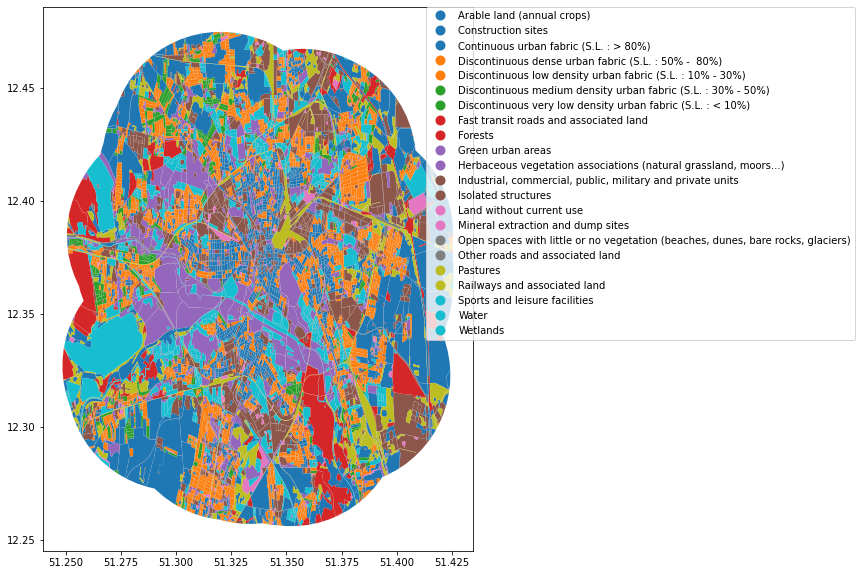

In [18]:
#plot
land_use_flexzone.plot(column='class_2018', figsize=(20, 10), legend=True,legend_kwds={'bbox_to_anchor': (1.9, 1.01)});


## Merge to trip data